Домашнее задание
1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
(разделяющую плоскость можно не строить, но обратите внимание, что
класса 3).
6. Отбросьте целевую переменную и оставьте только два признака -
sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и
визуализируйте полученную кластеризацию

**1.Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = load_iris()

In [ ]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**2. Оставьте два признака - sepal_length и sepal_width и целевую переменную**

In [ ]:
# Загруженные данные запишем в датафрейм df (оставим столбцы 'sepal length (cm)', 'sepal width (cm)', 'class'):
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['Class'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**3. Разделите данные на выборку для обучения и тестирования**

In [ ]:
x = df[['sepal length (cm)', 'sepal width (cm)']]
y = df['Class']

In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

**4. Постройте модель LDA**

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(x_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0])

In [ ]:
# Рассчитываем точность:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, lda.predict(x_test))

0.868421052631579

In [ ]:
# Значения коэффициентов:
lda.coef_

array([[-5.83421967,  8.36880937],
       [ 1.5215595 , -3.81430503],
       [ 3.81202284, -3.79343242]])

**5. Визуализируйте предсказания для тестовой выборки и центры классов
(разделяющую плоскость можно не строить, но обратите внимание, что
класса 3)**

In [ ]:
# Центроиды кластеров:
lda.means_

array([[4.99714286, 3.42857143],
       [5.88717949, 2.75128205],
       [6.53947368, 2.97894737]])

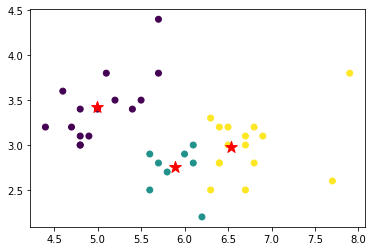

In [ ]:
# Кластеры тестовой выборки:
plt.scatter(x_test['sepal length (cm)'], x_test['sepal width (cm)'], c=lda.predict(x_test))
# Центры классов:
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

**6. Отбросьте целевую переменную и оставьте только два признака -
sepal_length и sepal_width**

In [ ]:
# Датафрейм x содержит два признака:
x.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
# Приведем данные к единому масштабу:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(x)

**7. Подберите оптимальное число кластеров для алгоритма kmeans и
визуализируйте полученную кластеризацию**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Указываем три кластера, т.к. в данном случае это заранее известно:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(x_scaled)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

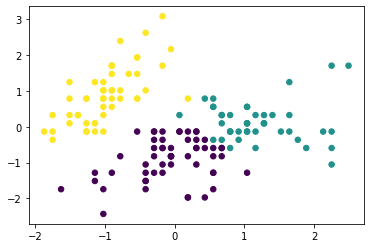

In [ ]:
# Строим точечную диаграмму с тремя кластерами:
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, s=30)